In [1]:
import torch
from torch import Tensor
print(torch.__version__)

2.0.1


In [4]:
# Install required packages.
import os
os.environ['TORCH'] = torch.__version__

!pip3 install torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip3 install torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip3 install pyg-lib -f https://data.pyg.org/whl/nightly/torch-${TORCH}.html
!pip3 install git+https://github.com/pyg-team/pytorch_geometric.git

Looking in links: https://data.pyg.org/whl/torch-2.0.1.html
Looking in links: https://data.pyg.org/whl/torch-2.0.1.html
Looking in links: https://data.pyg.org/whl/nightly/torch-2.0.1.html
ERROR: Could not find a version that satisfies the requirement pyg-lib (from versions: none)
ERROR: No matching distribution found for pyg-lib
  Cloning https://github.com/pyg-team/pytorch_geometric.git to /private/var/folders/nz/0trbh9kx61d_rsf7yfgbt3gc0000gn/T/pip-req-build-fqde61kw
  Running command git clone --filter=blob:none --quiet https://github.com/pyg-team/pytorch_geometric.git /private/var/folders/nz/0trbh9kx61d_rsf7yfgbt3gc0000gn/T/pip-req-build-fqde61kw
  Resolved https://github.com/pyg-team/pytorch_geometric.git to commit 999af2312efcdd7bd35e40c9b21c4a6a45464ac5
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


### Data

In [223]:
import pandas as pd

df1=pd.read_csv('../data/product_detail_fin.csv')
df2=pd.read_csv('../data/ppv_encrypted-001.csv', nrows=100000)

print('products.csv:')
print('===========')
print(df1.head())
print()
print('count.csv:')
print('============')
print(df2.head())

products.csv:
      product_id        price cms_vertical
0  9780000018885   690.000000         book
1  9780002245708  2665.000000         book
2  9780007154692   333.000000         book
3  9780007175185   192.222222         book
4  9780007216161   395.000000         book

count.csv:
         product_id  count                    account_id_enc
0  ACCG2DHTPQRPV4ZP      3  36ee6d3cd4e30b41e7b6aba58641e09a
1  ACCG57P5RGWJZARH     13  36ee6d3cd4e30b41e7b6aba58641e09a
2  MOBFUSBNAZGY7HQU     16  36ee6d3cd4e30b41e7b6aba58641e09a
3  ACCFHYJ8ZU9WDHDW      1  36ee6d3cd4e30b41e7b6aba58641e09a
4  ACNGFVMJ5ZKZVFDS      2  36ee6d3cd4e30b41e7b6aba58641e09a


In [439]:
df3=df1.merge(df2,how='inner',on='product_id')

In [440]:
df3

,product_id,price,cms_vertical,count,account_id_enc
0,9789313160281,223.093030,book,1,beb7cdb60edef91f16a67525d75db67d
1,9789324196194,507.167285,book,4,87d6d1e63939f2c5e8e325f8528aa6fe
2,9789389053814,102.682540,book,4,6456361fb345760571b12c84d5fd13aa
3,ACCEZ3YWU75CERHH,297.730723,keyboard,3,2c105eab8e2f0f457fd96571c89b96f5
4,ACCEZ3YWU75CERHH,297.730723,keyboard,4,77ce7b95252a8063c6643a211ed0d757
...,...,...,...,...,...
99995,WCWFEQH7KBUHPNJA,495.955217,wallet_card_wallet,1,277b2c508a3e19308e272a63ac313302
99996,WCWFEQH7KBUHPNJA,495.955217,wallet_card_wallet,1,bedf02aed3a8c8408a0c2d38602203ce
99997,WCWFEQH7KBUHPNJA,495.955217,wallet_card_wallet,1,f977c904f4249518b8f45c1b4bd91b6c
99998,WICFXYFM3EUZRN3B,141.101953,women_intimate_care,1,334ce76d02d53bc1021b056f9357a980


In [441]:
frequency_map = df3['cms_vertical'].value_counts().to_dict()
# Map the frequency values to the original column
df3['cms_vertical'] = df3['cms_vertical'].map(frequency_map)

In [442]:
# dropping rows with high cms and price
df3 = df3[df3['cms_vertical'] < 600]
df3 = df3[df3['price'] < 3000]
df3=df3.sample(frac=1).reset_index(drop=True)
df3

,product_id,price,cms_vertical,count,account_id_enc
0,ECMFMUP4ZMHGKZHW,344.710341,9,1,ad51ca680f94a78ce0e6d843de5a6baa
1,BELFGCNAGJBF2ZST,302.876452,93,1,6f1c70eebdf48a4d0c965d3a784f1500
2,HOLGF9GYQSFN74AD,202.666667,449,1,d8417730e746e79a75efb93418a0d81c
3,BLAGFKX8KQBRHYHH,658.944690,128,1,745e4a757c6ea127b4f28ed477b6aaf3
4,ACCFG3AAF3VH7JYP,152.384528,496,1,9345192950d807459c5ac474a65fa4a3
...,...,...,...,...,...
44108,SHIF8GG8PVFGYHGX,145.297101,137,1,acbef9138fa1101c008f8bed738d7a39
44109,VANFGFB9XVDZWFCY,175.587628,85,1,14b8723e8278b981bdeb7959e8ad3445
44110,MIXG4G398EB59HEN,2074.347260,436,1,79e1349b10a751e6d6b0cd5f340dedf2
44111,STLEFJ7UFQGRUUR3,887.330474,17,1,b847b1f361447f31e985a7c84a14b8ed


### Data insights

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


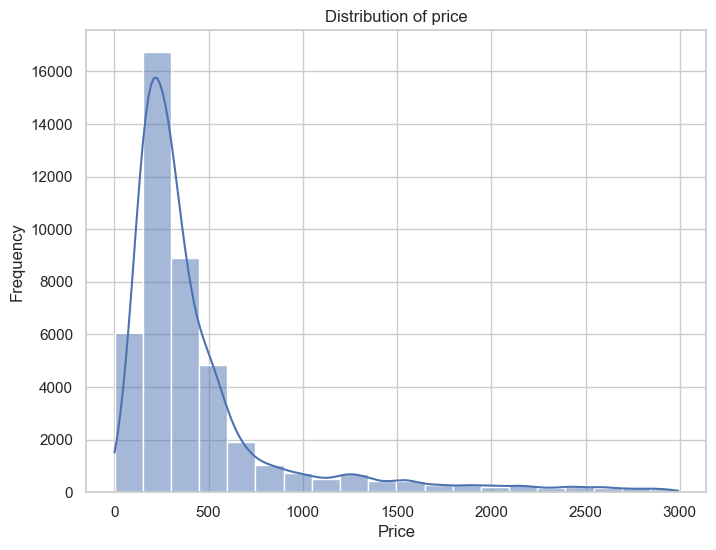

In [443]:
# Visualize the distribution of Price
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.histplot(df3['price'], kde=True, bins=20)
plt.title('Distribution of price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


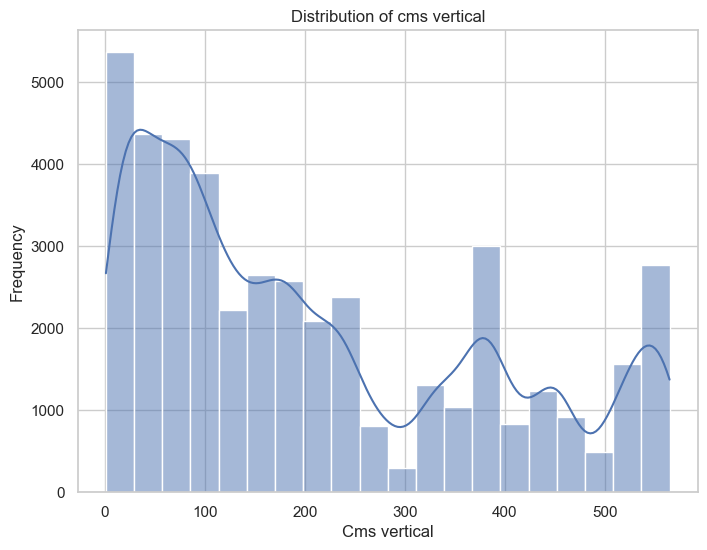

In [444]:
# Visualize the distribution of Price
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.histplot(df3['cms_vertical'], kde=True, bins=20)
plt.title('Distribution of cms vertical')
plt.xlabel('Cms vertical')
plt.ylabel('Frequency')
plt.show()

### Normalise and freq encoding

In [445]:
min_val = df3['count'].min()
max_val = df3['count'].max()
df3['count'] = (df3['count'] - min_val) / (max_val - min_val)
min_val = df3['price'].min()
max_val = df3['price'].max()
df3['price'] = (df3['price'] - min_val) / (max_val - min_val)

In [446]:
# frequency_map = df3['cms_vertical'].value_counts().to_dict()
# # Map the frequency values to the original column
# df3['cms_vertical'] = df3['cms_vertical'].map(frequency_map)

In [447]:
# User features
mean_rating = df2.groupby("account_id_enc")["count"].mean().rename("mean")
num_rating = df2.groupby("account_id_enc")["product_id"].count().rename("total")

In [448]:
num_rating

account_id_enc
00009c2ed5c8f7363e71c4379a3eb107     6
001c11387163b3efd1e054b53b45a089     5
0039bc86a7425a66ae079fef5ac3130c     1
00442d2c1b624f04ec61e58dfdaf04b5     2
004c635f008509b7c1552c54e51e8c8e     3
                                    ..
ffcc9e03cb7ab2651fc3254956c628fa    62
ffddd389ae788112a320f92c106c8e60     5
ffe93bef3176e3b03780e20a99936f83     4
fff81276f6c66016477e5233d4df3555     1
fffd3e784898367edc07cb012ffc0088    41
Name: total, Length: 3559, dtype: int64

In [449]:
num_users = df2.groupby("product_id")["count"].sum().rename("total")
num_users.max()

756

In [450]:
df3

,product_id,price,cms_vertical,count,account_id_enc
0,ECMFMUP4ZMHGKZHW,0.114735,9,0.0,ad51ca680f94a78ce0e6d843de5a6baa
1,BELFGCNAGJBF2ZST,0.100743,93,0.0,6f1c70eebdf48a4d0c965d3a784f1500
2,HOLGF9GYQSFN74AD,0.067225,449,0.0,d8417730e746e79a75efb93418a0d81c
3,BLAGFKX8KQBRHYHH,0.219839,128,0.0,745e4a757c6ea127b4f28ed477b6aaf3
4,ACCFG3AAF3VH7JYP,0.050407,496,0.0,9345192950d807459c5ac474a65fa4a3
...,...,...,...,...,...
44108,SHIF8GG8PVFGYHGX,0.048036,137,0.0,acbef9138fa1101c008f8bed738d7a39
44109,VANFGFB9XVDZWFCY,0.058167,85,0.0,14b8723e8278b981bdeb7959e8ad3445
44110,MIXG4G398EB59HEN,0.693259,436,0.0,79e1349b10a751e6d6b0cd5f340dedf2
44111,STLEFJ7UFQGRUUR3,0.296229,17,0.0,b847b1f361447f31e985a7c84a14b8ed


### Dicts and ids

In [451]:
import numpy as np
product_ids = np.unique(df3['product_id'])
user_ids = np.unique(df3['account_id_enc'])
product_dict = {}
user_dict = {}
for i in range(len(product_ids)):
    product_dict[product_ids[i]] = i 
for i in range(len(user_ids)):
    user_dict[user_ids[i]] = i

In [452]:
user_dict

{'001c11387163b3efd1e054b53b45a089': 0,
 '004c635f008509b7c1552c54e51e8c8e': 1,
 '007bab6a45de82f54e81d22e9176a375': 2,
 '00823dd4a9edfea5b59e9f0c5f46b2cb': 3,
 '00843ab6e84044d8144fd6719c5d044c': 4,
 '009758cf3b5495e81fd454e8761f7d2d': 5,
 '009b18068ca8def45152efd86a519a6f': 6,
 '00ce12d76d1d7fdac0a6341c2f3e6307': 7,
 '00ea051ea6f7c4df1ba76d26c77ae3a8': 8,
 '00f0ab351a2e6b0534e2c1688b3b962b': 9,
 '0102da73dc62272bd19e52cf4284cc6e': 10,
 '011e047cc5a350d9b469b8d648c39b88': 11,
 '013d657e5cce089f01c9508a5338a8a0': 12,
 '0147bb989d530571b892046d03e06a92': 13,
 '0149fbaeb08536f80b655f8e4b118b4c': 14,
 '0152f30515fe0b9be59a432c0d722341': 15,
 '01593490bfd42ffe38eff99812e05e65': 16,
 '0171875ac16b7694e58b5b923f22d15f': 17,
 '017a76d5691ed07ebac287692453d343': 18,
 '01851d3a1cf0362dcc608ccb7065a1a8': 19,
 '019259cc359ba9cf780ce77965be5187': 20,
 '022176cfc442245a757f0c569ef5e2c9': 21,
 '026037520872fbff2c3ca87e41105be1': 22,
 '02664c7538d6f3e81fbfc6bc2c7af048': 23,
 '027d35826dbd1ee89cef9512

In [453]:
product_dict

{'9780008123208': 0,
 '9780008386597': 1,
 '9780062312686': 2,
 '9780062641540': 3,
 '9780071074827': 4,
 '9780099572862': 5,
 '9780143028574': 6,
 '9780143062226': 7,
 '9780143333166': 8,
 '9780143424123': 9,
 '9780143424680': 10,
 '9780143442295': 11,
 '9780143442950': 12,
 '9780143442974': 13,
 '9780143446248': 14,
 '9780143450832': 15,
 '9780143452676': 16,
 '9780143453635': 17,
 '9780190123659': 18,
 '9780195628166': 19,
 '9780195687859': 20,
 '9780198075554': 21,
 '9780198076407': 22,
 '9780199472222': 23,
 '9780670093250': 24,
 '9781408855652': 25,
 '9781409303183': 26,
 '9781444775815': 27,
 '9781542040464': 28,
 '9781542094139': 29,
 '9781612680194': 30,
 '9781786330895': 31,
 '9781847941831': 32,
 '9786273549903': 33,
 '9788121905510': 34,
 '9788121924405': 35,
 '9788121924986': 36,
 '9788129118929': 37,
 '9788129135513': 38,
 '9788129142146': 39,
 '9788129142153': 40,
 '9788131017746': 41,
 '9788131251430': 42,
 '9788171673407': 43,
 '9788172234881': 44,
 '9788172234980': 45

### Node features and Edge list

In [454]:
prod_feat_len = 3
user_feat_len = 2

In [455]:
## Maps for edges and id encoding
s=[]
t=[]
e_wt=[]
edge_list = [[], []]

# create empty features 2d array of size (total_nodes, feature dim)
for index,row in df3.iterrows():
    prod_feat_len = len(df3.iloc[index].drop(['product_id','account_id_enc','count']).to_numpy())
    break
    
user_nodes = len(user_dict)
prod_nodes = len(product_dict)

user_features = np.empty(shape=(user_nodes,2))
prod_features = np.empty(shape=(prod_nodes,3))

for index,row in df3.iterrows():
    prod_id=row['product_id']
    user_id=row['account_id_enc']
    e_wt.append([float(row['count'])])
    user_index = user_dict[user_id]
    prod_index = product_dict[prod_id]

    s.append(user_dict[user_id])
    t.append(product_dict[prod_id])
    edge_list[0].append(user_index)
    edge_list[1].append(prod_index)

    # node_features[prod_index] = ohe.iloc[index].drop(['product_id','account_id_enc','count']).to_numpy()
    u=np.array([mean_rating[user_id], num_rating[user_id]])
    # padded_u = np.pad(u, (0, 62), mode='constant')
    p = df3.iloc[index].drop(['product_id','account_id_enc','count']).to_numpy()
    p = np.append(p, num_users[prod_id])
    # print(prod_features[prod_index].shape)
    # padded_p = np.pad(p, (0, 62), mode='constant')
    # padded_u = u
    user_features[user_index] = u
    prod_features[prod_index] = p

In [456]:
prod_features = torch.tensor(prod_features, dtype=float, requires_grad=True).to(torch.double)
prod_features.shape

torch.Size([19533, 3])

In [457]:
user_features = torch.tensor(user_features, dtype=float, requires_grad=True).to(torch.double)
user_features.shape

torch.Size([2973, 2])

In [458]:
print(user_nodes)
print(prod_nodes)

2973
19533


In [459]:
prod_features

tensor([[5.7938e-02, 2.3100e+02, 1.0000e+00],
        [9.4937e-02, 2.3100e+02, 1.0000e+00],
        [1.4573e-01, 2.3100e+02, 2.0000e+00],
        ...,
        [5.5682e-02, 4.0000e+00, 5.0000e+00],
        [1.1106e-01, 4.0000e+00, 1.0000e+00],
        [1.1535e-01, 1.4000e+01, 3.0000e+00]], dtype=torch.float64,
       requires_grad=True)

In [460]:
prod_f = prod_features.detach().numpy()

### Scatter Plot

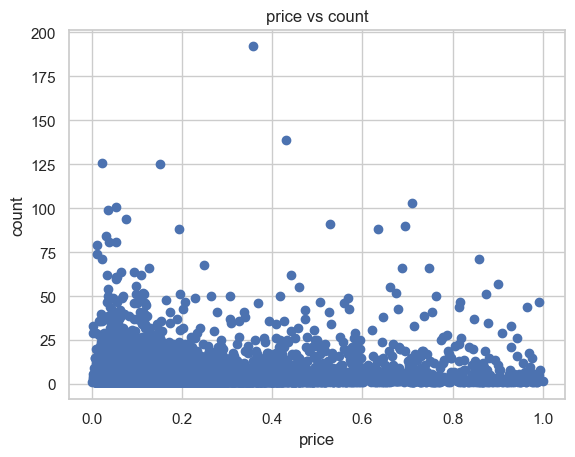

In [461]:
# Scatter plot to visualize the relationship between age and price
plt.scatter(prod_f[:,0], prod_f[:,2])
plt.xlabel('price')
plt.ylabel('count')
plt.title('price vs count')
plt.show()

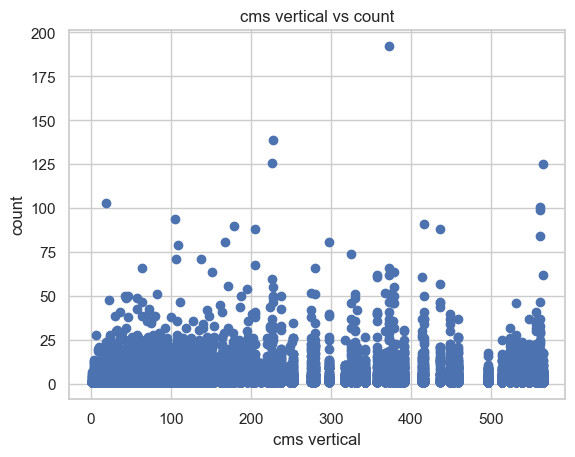

In [462]:
# Scatter plot to visualize the relationship between age and price
plt.scatter(prod_f[:,1], prod_f[:,2])
plt.xlabel('cms vertical')
plt.ylabel('count')
plt.title('cms vertical vs count')
plt.show()

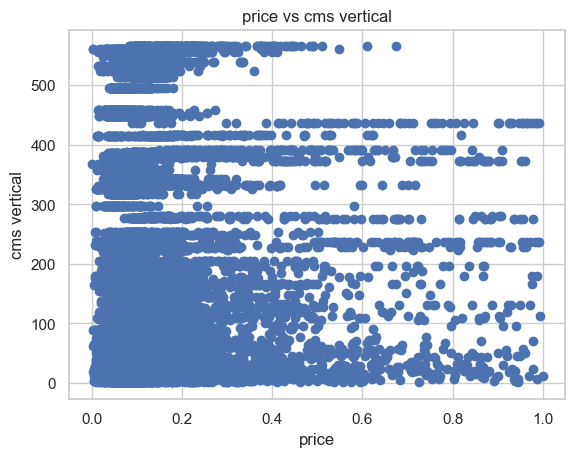

In [463]:
# Scatter plot to visualize the relationship between age and price
plt.scatter(prod_f[:,0], prod_f[:,1])
plt.xlabel('price')
plt.ylabel('cms vertical')
plt.title('price vs cms vertical')
plt.show()

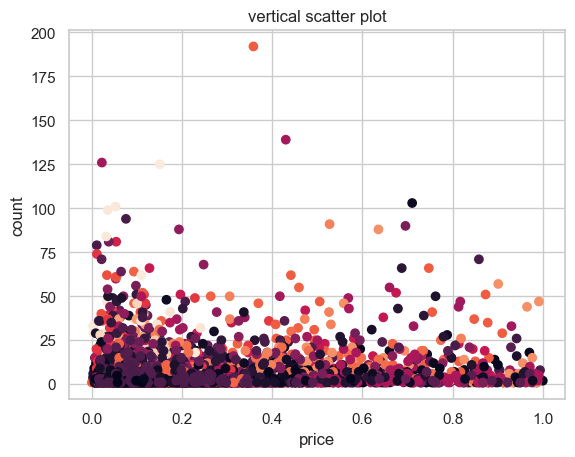

In [464]:
plt.scatter(prod_f[:,0], prod_f[:,2], c=prod_f[:,1])
plt.xlabel('price')
plt.ylabel('count')
plt.title('vertical scatter plot')
plt.show()

### Clustering - KMeans

In [465]:
node_features = prod_features.detach().numpy()

In [466]:
node_features.shape

(19533, 3)

In [467]:
k = 5

In [468]:
data = pd.DataFrame({
    'Price': prod_f[:,0],
    'Vertical': prod_f[:,1],
    'Views': prod_f[:,2]
})

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


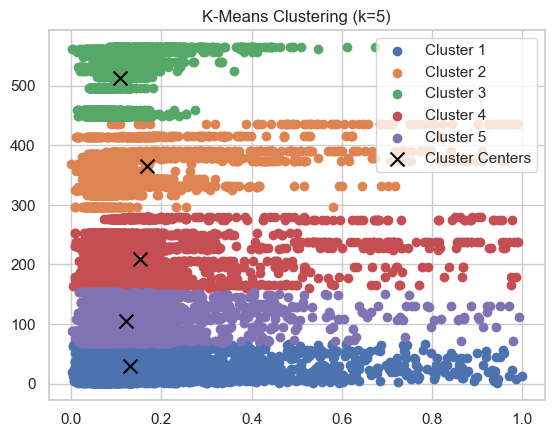

In [469]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(node_features)

# Scatter plot the results
for cluster_id in range(k):
    plt.scatter(node_features[clusters == cluster_id, 0], node_features[clusters == cluster_id, 1], label=f'Cluster {cluster_id + 1}')

# Plot the cluster centers
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='black', s=100, label='Cluster Centers')

plt.title(f'K-Means Clustering (k={k})')
plt.legend()
plt.show()

### DBSCAN (Density-Based):

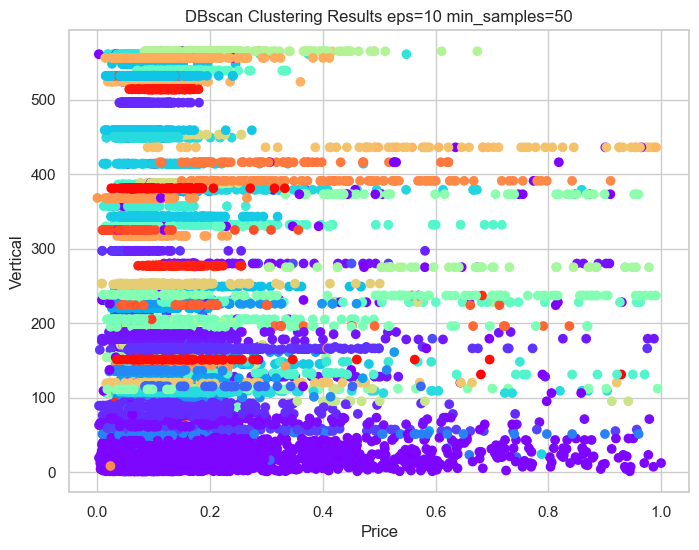

In [531]:
from sklearn.cluster import DBSCAN

# Create a DBSCAN model
dbscan = DBSCAN(eps=1.8, min_samples=2)
clusters = dbscan.fit_predict(node_features)

# Create a scatter plot for the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data['Price'], data['Vertical'], c=clusters, cmap='rainbow')
plt.xlabel('Price')
plt.ylabel('Vertical')
plt.title('DBscan Clustering Results eps=10 min_samples=50')
plt.show()


### TSNE

In [408]:
# Perform dimensionality reduction using t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
embeddings_2d = tsne.fit_transform(node_features)

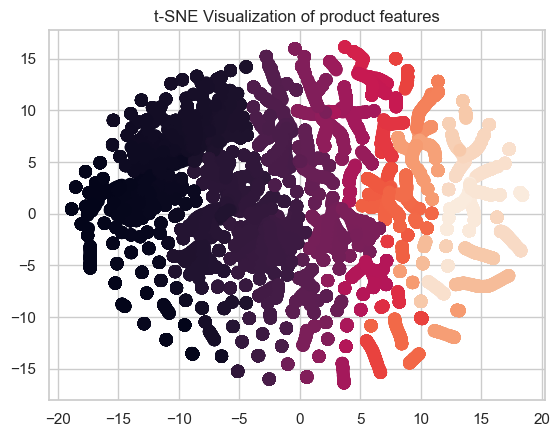

In [409]:
import matplotlib.pyplot as plt

color = prod_features[:,1].detach().numpy()

plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], s=70, c=color)
plt.title('t-SNE Visualization of product features')
plt.show()

In [410]:
prod_features.shape

torch.Size([19533, 3])

In [486]:
from scipy.spatial import distance

# Calculate pairwise distances
pairwise_distances = distance.squareform(distance.pdist(data))

In [488]:
pairwise_distances

array([[0.00000000e+00, 3.69990544e-02, 1.00384657e+00, ...,
        2.27035240e+02, 2.27000006e+02, 2.17009224e+02],
       [3.69990544e-02, 0.00000000e+00, 1.00128927e+00, ...,
        2.27035243e+02, 2.27000001e+02, 2.17009217e+02],
       [1.00384657e+00, 1.00128927e+00, 0.00000000e+00, ...,
        2.27019841e+02, 2.27002205e+02, 2.17002306e+02],
       ...,
       [2.27035240e+02, 2.27035243e+02, 2.27019841e+02, ...,
        0.00000000e+00, 4.00038333e+00, 1.01982136e+01],
       [2.27000006e+02, 2.27000001e+02, 2.27002205e+02, ...,
        4.00038333e+00, 0.00000000e+00, 1.01980399e+01],
       [2.17009224e+02, 2.17009217e+02, 2.17002306e+02, ...,
        1.01982136e+01, 1.01980399e+01, 0.00000000e+00]])

In [489]:
sorted_distances = np.sort(pairwise_distances, axis=1)

In [492]:
k_distances = sorted_distances[:, 2]

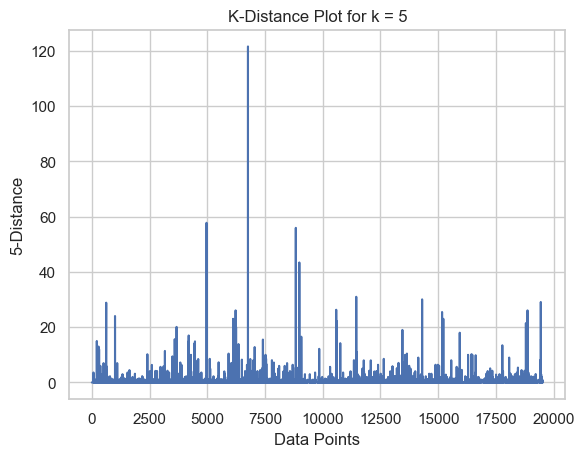

In [493]:
plt.plot(range(len(k_distances)), k_distances)
plt.xlabel('Data Points')
plt.ylabel(f'{k}-Distance')
plt.title(f'K-Distance Plot for k = {k}')
plt.show()

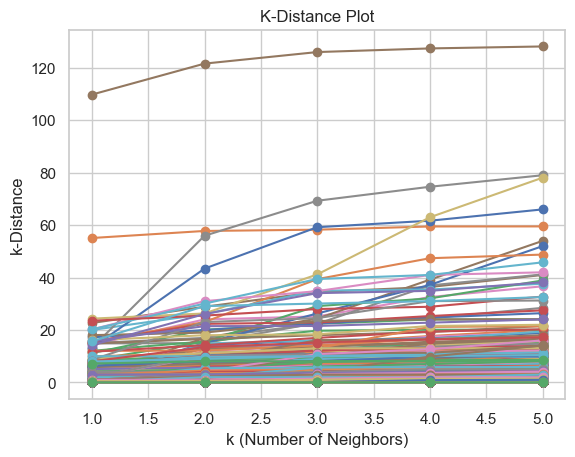

In [498]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Calculate k-distances
k_values = [1,2,3,4,5]  # You can adjust the range as needed
k_distances = []

for k in k_values:
    knn = NearestNeighbors(n_neighbors=k)
    knn.fit(data)  # Replace with your data
    distances, _ = knn.kneighbors()
    k_distances.append(distances[:, -1])

# Plot the curve
plt.plot(k_values, k_distances, marker='o')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("k-Distance")
plt.title("K-Distance Plot")
plt.show()

In [519]:
!pip install --upgrade kneed

In [520]:
import kneed
from kneed import KneeLocator

kneedle = KneeLocator(k_values, k_distances, curve='convex', direction='decreasing')
knee_point = kneedle.elbow

# The knee_point variable now contains the knee point value of k
print("Knee Point (k):", knee_point)

ModuleNotFoundError: No module named 'kneed'